In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load train and test files
train = pd.read_csv('../data/cs-training.csv')
test = pd.read_csv('../data/cs-test.csv')

data = pd.concat([train, test])

In [3]:
# list out all the features ( SeriousDlqin2yrs is the target variable )
print 'Column names are %s ' %(train.columns)

Column names are Index([u'Unnamed: 0', u'SeriousDlqin2yrs',
       u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object') 


## Exploratory Data Analysis

In [10]:
# column Unnamed: 0
train['Unnamed: 0'].describe()

count    150000.000000
mean      75000.500000
std       43301.414527
min           1.000000
25%       37500.750000
50%       75000.500000
75%      112500.250000
max      150000.000000
Name: Unnamed: 0, dtype: float64

In [23]:
test['Unnamed: 0'].describe()

count    101503.000000
mean      50752.000000
std       29301.536524
min           1.000000
25%       25376.500000
50%       50752.000000
75%       76127.500000
max      101503.000000
Name: Unnamed: 0, dtype: float64

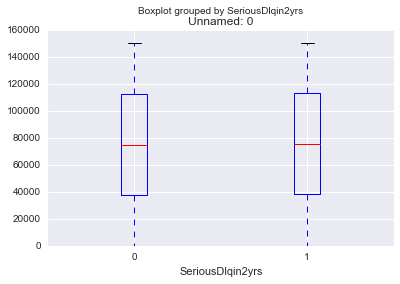

In [22]:
train.boxplot(column='Unnamed: 0', by='SeriousDlqin2yrs');

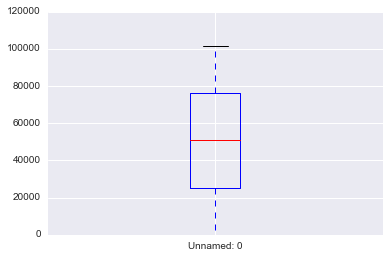

In [21]:
test.boxplot(column='Unnamed: 0');

## Revolving Utilization of Unsecured Lines

* Total balance on credit cards and personal lines of credit except real state and no installment debt like car loans divided by sum of credit limits

In [24]:
# column RevolvingUtilizationOfUnsecuredLines
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [25]:
test['RevolvingUtilizationOfUnsecuredLines'].describe()

count    101503.000000
mean          5.310000
std         196.156039
min           0.000000
25%           0.030131
50%           0.152586
75%           0.564225
max       21821.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [44]:
def percentile_based_mask(q=0.9):
    threshold_value = train.RevolvingUtilizationOfUnsecuredLines.quantile(q=q)
    return (train.SeriousDlqin2yrs == 1) & (train.RevolvingUtilizationOfUnsecuredLines < threshold_value)

def target_based_mask():
    return train.SeriousDlqin2yrs == 1

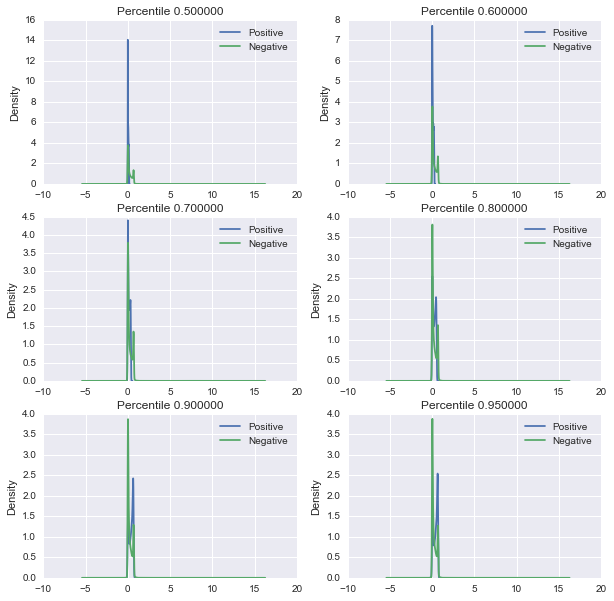

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
percentiles = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

index = 0
for i in range(3):
    for j in range(2):
        ax = axes[i][j]
        percentile = percentiles[index]
        index += 1
        
        mask = percentile_based_mask(percentile)

        ax.set_title('Percentile %f'%(percentile))

        train[mask].RevolvingUtilizationOfUnsecuredLines.map(np.log1p).plot(kind='kde', label='Positive', ax=ax)
        train[~mask].RevolvingUtilizationOfUnsecuredLines.map(np.log1p).plot(kind='kde', label='Negative', ax=ax)
        
        ax.legend(loc='best');

** As you can see if we consider values that are less then 90th percentile we find that there is a distinction between density plots for postiive and negative instances of target variable **

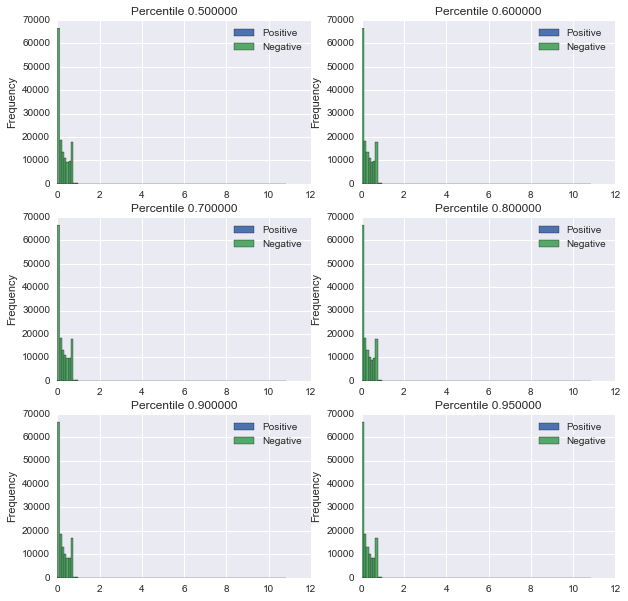

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
percentiles = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

index = 0
for i in range(3):
    for j in range(2):
        ax = axes[i][j]
        percentile = percentiles[index]
        index += 1
        
        mask = percentile_based_mask(percentile)

        ax.set_title('Percentile %f'%(percentile))

        train[mask].RevolvingUtilizationOfUnsecuredLines.map(np.log1p).plot(kind='hist', bins=100, label='Positive', ax=ax)
        train[~mask].RevolvingUtilizationOfUnsecuredLines.map(np.log1p).plot(kind='hist', bins=100, label='Negative', ax=ax)
        
        ax.legend(loc='best');

## Age

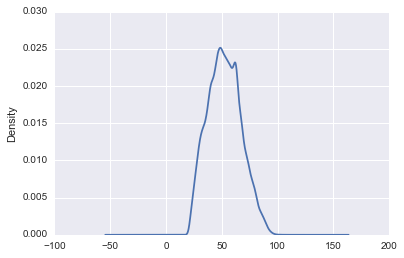

In [29]:
mask = target_based_mask()

train[mask].Age.plot(kind='kde')